In [1]:
import os
os.chdir('..')

In [2]:
from deterministic.homogeneous import solve_homogeneous_system, compute_diagram, compute_2D_diagram, compute_2D_botnet, compute_botnet_threshold
from deterministic.plots import plot_evolution, plot_diagram, plot_2D_diagram, plot_3D_protected, plot_2D_botnet, plot_botnet_threshold, plot_2D_botnet_time

import numpy as np

# Comparison with the complete graph

Now that we have a good understanding of the model, we can try to reproduce some of the results with the Gillespie algorithm on the complete graph to check if it's correct. In particular, we will focus on the final fraction of protected nodes as a function of $\beta_W$ and $\epsilon$, and the size of the botnet as a function of $\beta_B$ and $\beta_W$.

In [24]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('protected_ER_N10000_*'):

    bW = float(file_path.stem.split('_bW')[1].split('_')[0])
    e = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.001]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bW, e, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

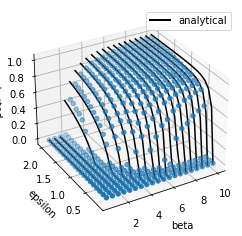

In [25]:
plot_3D_protected(results)

In [26]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_ER_N10000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

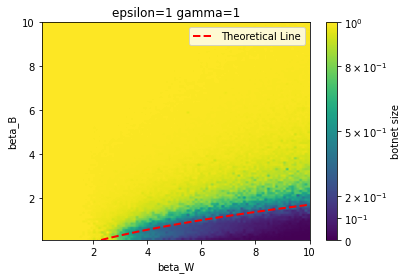

In [27]:
plot_2D_botnet(results)

In [7]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 1.0

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_ER_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

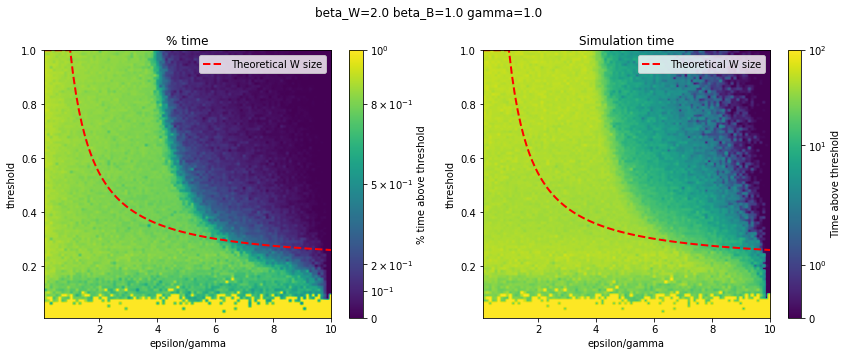

In [8]:
plot_2D_botnet_time(results, bW, bB, gamma)